centroide 0 = [7.05781773 6.21327704]
centroide 1 = [ 9.55006356 -6.98392902]
centroide 2 = [3.34294673 6.21052482]


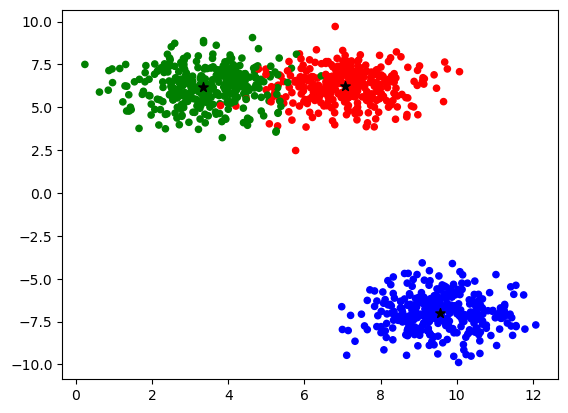

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#cargamos la informacion del ejercicio
data = np.load('KMeans/A.npy')
clase = np.load('KMeans/_.npy')

#guardamos dentro de un arreglo los colores que deberian tomar los puntos
Color=['red','green','blue']
aColor=[]

for i in clase:
    aColor.append(Color[i])

#aplicamos Kmeans, en el ejercicio se nos dice que el K debe ser igual a 3
#Nota: Kmeans es no supervisado, no necesita un valor de Y
kmeans = KMeans(n_clusters=3).fit(data)
#obtenemos los centroides
centroids = kmeans.cluster_centers_

for i in range(len(centroids)):
    print("centroide",i,"=",centroids[i])
    
fig = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=aColor,s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c="black", s=50)
plt.show()



[2. 5.] pertenece a la clase green
[3.2 6.5] pertenece a la clase green
[7.  2.5] pertenece a la clase red
[9.  3.2] pertenece a la clase red
[ 9. -6.] pertenece a la clase blue
[11. -8.] pertenece a la clase blue


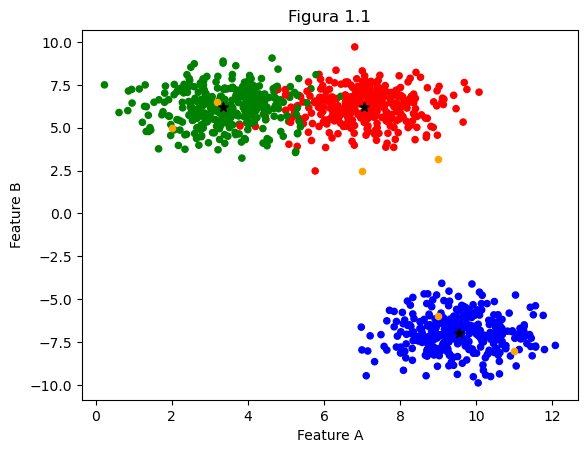

In [13]:
test = np.array([[2,5],[3.2,6.5],[7,2.5],[9,3.2],[9,-6],[11,-8]])
predict = kmeans.predict(test)

#nota esta alterado para que coincida el cluster con el color propuesto
#no es igual a "Color", hay que ver como relacionar cada cluester con el color correspondiente
Color2=['red','blue','green']

for i in range(len(predict)):
    print(test[i], "pertenece a la clase", Color2[predict[i]])

fig = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=aColor,s=20)
plt.scatter(test[:, 0], test[:, 1], c="orange",s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c="black", s=50)
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.title('Figura 1.1')
plt.show()